In [49]:
''' Pyber
The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a 
fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the 
company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active 
driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship 
between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.
**********************************************************************************************
'''

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

#init variables for the bubble plot 
fares_by_city=[] 
rides_by_city=[] 
avg_fare=[]
cities=[]
drivers_by_city=[] 
unique_city=[]

#variable initiation for the pie charts
fares=[]
city_type=[]
temp_city="first"
temp_fare=0
city_counter=0
ride_counter=0
fare_sum=0
urban_fare=0


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#make into pandas
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

ride_df=ride_df.dropna(axis='columns') #drop the NaN columns
merge_table = pd.merge(city_df, ride_df, on="city")  #merge the tables by the city column, there is no header row
# Read the City and Ride Data

#for j in len(merge_table):
merge_table = merge_table.sort_values(by='city') #sort table by cities, there is no header row
#print(merge_table)
#print(merge_table.loc[(merge_table['city'] == 'Amandaburgh')])
 
# Read the City and Ride Data
cities=merge_table.loc[:,["city"]]  #peel off city and fare column and place in new dfcities=merge_table.loc[:,["city"]] 
fares=merge_table.loc[:,["fare"]]  #peel off the fares column and place in the list fares[]
unique_city.append(cities.iloc[0,0]) #load up the first city into unique_city  
  

#main loop for sorting tallying up all the fares by unique city and rides 
for i in range(0, len(cities)):  #go through each city in the main loop
   current_city = cities.iloc[i,0] #OLD str(cities.iloc[i,:])

   if current_city in unique_city:   #is j already added to unique_city? 
        #print("first if statement triggered********************************************")
        temp_fare = temp_fare + fares.iloc[i,0] #running tally of fare int he current city to calc avg later
        ride_counter +=1  #running tally of rides in current city 
        #print(" rolling fare tot "+str(temp_fare)+" " + str(fares.iloc[i,0]))
        continue  #exit and avoid the else 
              
   else:
        unique_city.append(current_city) #since we've come across a new city, add new city to unique_city 
        avg_fare.append(temp_fare/ride_counter)
        fares_by_city.append(temp_fare) 
        rides_by_city.append(ride_counter)
        temp_fare=0 #reset temp_fare variable for next city 
        ride_counter=0 #reset the ride counter for the next city 
        drivers_by_city.append(merge_table.loc[i,"driver_count"]) #save the driver count/city
        city_type.append(merge_table.loc[i,"type"])  #put whether the city is urban, suburban or rural into city_type
        
        temp_fare = temp_fare + fares.iloc[i,0] #need to start running fare tally for the new city   
        ride_counter +=1  #also start ride tally  
        

#because we miss the else statement above on the final iteration we need to update the variables just like in the else        
avg_fare.append(temp_fare/ride_counter)
fares_by_city.append(temp_fare)   
temp_fare=0 #reset temp_fare variable 
drivers_by_city.append(merge_table.loc[i,"driver_count"]) #save the driver count/city
city_type.append(merge_table.loc[i,"type"])  #put whether the city is urban, suburban or rural into city_type
rides_by_city.append(ride_counter)

sub_fares=[]
sub_rides=[]
rur_fares=[]
rur_rides=[]
urb_fares=[]
urb_rides=[]
for w in range(0,len(unique_city)): 
    if city_type[w] == "Suburban": 
        sub_fares.append(avg_fare[w])
        sub_rides.append(rides_by_city[w])
    if city_type[w] == "Rural": 
        rur_fares.append(avg_fare[w])
        rur_rides.append(rides_by_city[w])
    if city_type[w] == "Urban": 
        urb_fares.append(avg_fare[w])
        urb_rides.append(rides_by_city[w])
        
        
    print(str((unique_city[w])), end='')
    print("Fares "+str(fares_by_city[w]), end='')
    print(" rides "+str(rides_by_city[w]), end='')
    print(" avg fare "+str(avg_fare[w]), end='')
    #print(" #drivers " + str(drivers_by_city[w]), end='')
    print(" c.Type " + str(city_type[w]))
   

#First town A should sum to 443.55 off 18 rides 26.09 avg fare
#2nd Barasview 557.31 off 21 samples 
print(len(sub_fares))
print(len(urb_fares))
print(len(rur_fares)) #only 6 of these

print(len(avg_fare))
print(len(rides_by_city))


AmandaburghFares 443.55000000000007 rides 18 avg fare 24.64166666666667 c.Type Urban
BarajasviewFares 557.3100000000001 rides 22 avg fare 25.33227272727273 c.Type Urban
BarronchesterFares 582.76 rides 16 avg fare 36.4225 c.Type Urban
BethanylandFares 593.21 rides 18 avg fare 32.95611111111111 c.Type Urban
BradshawfurtFares 400.64000000000004 rides 10 avg fare 40.06400000000001 c.Type Urban
BrandonfortFares 673.3100000000001 rides 19 avg fare 35.43736842105263 c.Type Urban
CarriemouthFares 764.4899999999999 rides 27 avg fare 28.31444444444444 c.Type Urban
ChristopherfurtFares 661.5500000000002 rides 27 avg fare 24.501851851851857 c.Type Urban
ColemanlandFares 679.6800000000002 rides 22 avg fare 30.89454545454546 c.Type Urban
DavidfurtFares 543.9300000000001 rides 17 avg fare 31.99588235294118 c.Type Urban
DeanvilleFares 491.00999999999993 rides 19 avg fare 25.842631578947366 c.Type Urban
East AaronburyFares 230.95 rides 9 avg fare 25.66111111111111 c.Type Urban
East DanielviewFares 536.

In [3]:

#ride_df.drop(ride_df.index[[5]])



## Bubble Plot of Ride Sharing Data

(18, 46)

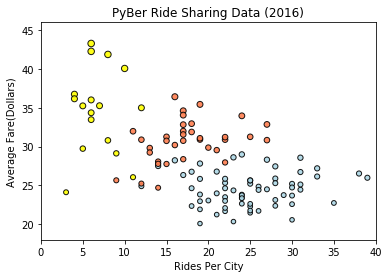

In [89]:
fare_sum = merge_table['fare'].sum()
urban_only = merge_table.loc[(merge_table['type'] == 'Urban')]
suburban_only = merge_table.loc[(merge_table['type'] == 'Suburban')]
rural_only= merge_table.loc[(merge_table['type'] == 'Rural')]

#here's the pie chart 
#plt.pie(fares, explode, types, colors, autopct='%1.1f%%') #the autopct shows the lables and formats them 
 #When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# Calculate Type Percents
unique_rural_city=[]
rural_fare_tot=[]
rural_rides=[] 
rural_ride_avg=[]

rural_fare=0
rural_ride_counter=0
unique_rural_city.append(rural_only.iloc[0,0])

#calculate rural metrics ******************************************************
for k in range(0, len(rural_only)):
  if rural_only.iloc[k,0] in unique_rural_city: 
    #column 4 is fare 
    rural_fare = rural_fare + rural_only.iloc[k,4]
    rural_ride_counter +=1
    continue
    #print(rural_only.iloc[k,4]) #column 4 is fare  
  else:
    unique_rural_city.append(rural_only.iloc[k,0])
    rural_fare_tot.append(rural_fare) 
    rural_rides.append(rural_ride_counter) 
    rural_ride_avg.append(rural_fare/rural_ride_counter)
    rural_ride_counter=0
    rural_fare=0
    rural_fare = rural_fare + rural_only.iloc[k,4]
    rural_ride_counter +=1

#print(rural_ride_avg) 
#print(rural_rides)

unique_urban_city=[]
urban_fare_tot=[]
urban_rides=[] 
urban_ride_avg=[]
urban_fare=0
urban_ride_counter=0
unique_urban_city.append(urban_only.iloc[0,0])
#calculate urbanmetrics ******************************************************
for k in range(0, len(urban_only)):
  if urban_only.iloc[k,0] in unique_urban_city: 
    #column 4 is fare 
    urban_fare = urban_fare + urban_only.iloc[k,4]
    urban_ride_counter +=1
    continue
    #print(urban_only.iloc[k,4]) #column 4 is fare  
  else:
    unique_urban_city.append(urban_only.iloc[k,0])
    urban_fare_tot.append(urban_fare) 
    urban_rides.append(urban_ride_counter) 
    urban_ride_avg.append(urban_fare/urban_ride_counter)
    urban_ride_counter=0
    urban_fare=0
    urban_fare = urban_fare + urban_only.iloc[k,4]
    urban_ride_counter +=1
unique_suburban_city=[]
suburban_fare_tot=[]
suburban_rides=[] 
suburban_ride_avg=[]
suburban_fare=0
suburban_ride_counter=0
unique_suburban_city.append(suburban_only.iloc[0,0])

#calculate suburbanmetrics ******************************************************
for k in range(0, len(suburban_only)):
  if suburban_only.iloc[k,0] in unique_suburban_city: 
    #column 4 is fare 
    suburban_fare = suburban_fare + suburban_only.iloc[k,4]
    suburban_ride_counter +=1
    continue
    #print(suburban_only.iloc[k,4]) #column 4 is fare  
  else:
    unique_suburban_city.append(suburban_only.iloc[k,0])
    suburban_fare_tot.append(suburban_fare) 
    suburban_rides.append(suburban_ride_counter) 
    suburban_ride_avg.append(suburban_fare/suburban_ride_counter)
    suburban_ride_counter=0
    suburban_fare=0
    suburban_fare = suburban_fare + suburban_only.iloc[k,4]
    suburban_ride_counter +=1    
    
#lets draw the three separate bubbleplots 
plt.scatter(rural_rides, rural_ride_avg, marker="o", facecolor="yellow", edgecolor="black",s=rural_ride_avg*10000, alpha=0.9)
plt.scatter(urban_rides, urban_ride_avg, marker="o", facecolor="lightblue", edgecolor="black",s=urban_ride_avg*10000, alpha=0.9)
plt.scatter(suburban_rides, suburban_ride_avg, marker="o", facecolor="coral", edgecolor="black",s=suburban_ride_avg*10000, alpha=0.9)
plt.savefig("Pyber_Ride_Sharing_Bubble_Plot.png")

plt.title("PyBer Ride Sharing Data (2016)")
plt.xlabel("Rides Per City")
plt.ylabel("Average Fare(Dollars)")
plt.xlim(0,40)
plt.ylim(18,46)


In [75]:
# Show plot
plt.show()

## Total Fares by City Type

In [59]:


unique_urban_city=[]
urban_fare_tot=[]
urban_rides=[] 
urban_ride_avg=[]
urban_fare=0
urban_ride_counter=0
unique_urban_city.append(urban_only.iloc[0,0])
#calculate urbanmetrics ******************************************************
for k in range(0, len(urban_only)):
  if urban_only.iloc[k,0] in unique_urban_city: 
    #column 4 is fare 
    urban_fare = urban_fare + urban_only.iloc[k,4]
    urban_ride_counter +=1
    continue
    #print(urban_only.iloc[k,4]) #column 4 is fare  
  else:
    unique_urban_city.append(urban_only.iloc[k,0])
    urban_fare_tot.append(urban_fare) 
    urban_rides.append(urban_ride_counter) 
    urban_ride_avg.append(urban_fare/urban_ride_counter)
    urban_ride_counter=0
    urban_fare=0
    urban_fare = urban_fare + urban_only.iloc[k,4]
    urban_ride_counter +=1
unique_suburban_city=[]
suburban_fare_tot=[]
suburban_rides=[] 
suburban_ride_avg=[]
suburban_fare=0
suburban_ride_counter=0
unique_suburban_city.append(suburban_only.iloc[0,0])

#calculate suburbanmetrics ******************************************************
for k in range(0, len(suburban_only)):
  if suburban_only.iloc[k,0] in unique_suburban_city: 
    #column 4 is fare 
    suburban_fare = suburban_fare + suburban_only.iloc[k,4]
    suburban_ride_counter +=1
    continue
    #print(suburban_only.iloc[k,4]) #column 4 is fare  
  else:
    unique_suburban_city.append(suburban_only.iloc[k,0])
    suburban_fare_tot.append(suburban_fare) 
    suburban_rides.append(suburban_ride_counter) 
    suburban_ride_avg.append(suburban_fare/suburban_ride_counter)
    suburban_ride_counter=0
    suburban_fare=0
    suburban_fare = suburban_fare + suburban_only.iloc[k,4]
    suburban_ride_counter +=1

In [58]:
# Show Figure
plt.show()


## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x25d811f77f0>,
 [Text(-0.6563378293500354, 1.0045997480410216, 'Urban'),
  Text(0.4418650763250774, -1.0073506114180075, 'Suburban'),
  Text(1.0849974589471931, -0.18105389826826115, 'Rural')],
 [Text(-0.38286373378752064, 0.5860165196905958, '68.4%'),
  Text(0.2410173143591331, -0.5494639698643677, '26.3%'),
  Text(0.5918167957893781, -0.09875667178268789, '5.3%')])

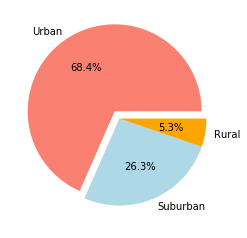

In [65]:
# Calculate Ride Percents
rides = [urban_only['fare'].count(), suburban_only['fare'].count(), rural_only['fare'].count()]
# Build Pie Chart
plt.pie(rides, explode, types, colors, autopct='%1.1f%%') #the autopct shows the lables and formats them 
# Save Figure


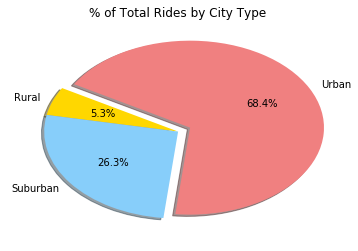

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

2405
78
490


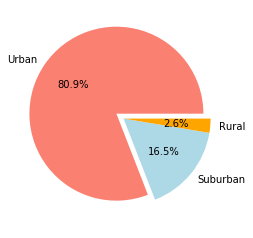

In [67]:

urban_ddf = city_df.loc[(city_df['type'] == 'Urban')]
urban_drivers = urban_ddf['driver_count'].sum()
suburban_ddf = city_df.loc[(city_df['type'] == 'Suburban')]
suburban_drivers = suburban_ddf['driver_count'].sum()
rural_ddf= city_df.loc[(city_df['type'] == 'Rural')]
rural_drivers = rural_ddf['driver_count'].sum()
drivers = [urban_drivers, suburban_drivers, rural_drivers]
plt.pie(drivers, explode, types, colors, autopct='%1.1f%%') #the autopct shows the lables and formats them
print(urban_drivers)
print(rural_drivers)
print(suburban_drivers)
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


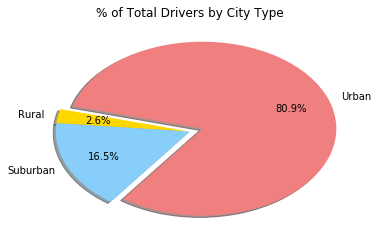

In [6]:
# Show Figure
plt.show()